In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy as sp
from scipy import integrate

In [3]:
## Punto 1

Para expresar la ecuacion de difusion en cordenadas esfericas primero es importante conocer como se expresa en cordenadas esfericas. Dado que la ecuacion de difusion es la forma general de la ecuacion, y su diferencia se encuentra relacionada con el coeficiente de difusion, en cordenadas cartesianas es igual a

$$ \frac{\partial }{\partial_x}(\frac{\partial_\tau  }{\partial_x})+\frac{\partial }{\partial_y}(\frac{\partial_\tau  }{\partial_y})+\frac{\partial }{\partial_z}(\frac{\partial_\tau  }{\partial_z})= - \frac{1}{D} $$

Cabe aclarar que estamos usando la ecuacion de difusion dependiente de la posicion y el tiempo medio. De esta forma, vamos a usar el siguiente factor para pasar la ecuacion a cordenadas esfericas

$$ \left ( \frac{r^{2}}{r^{2}}, \frac{sin(\theta )}{r^{2}sin(\theta )}, \frac{1}{r^{2}sin^{2}(\theta )}  \right ) $$

Sustituyendo todo en la ecuacion de calor, tenemos que 

$$   \frac{1}{r^{2}} \frac{\partial }{\partial_r}(r^{2} \frac{\partial_\tau  }{\partial_r})+ \frac{1}{r^{2}sin(\theta)} \frac{\partial }{\partial_\theta}(sin(\theta)\frac{ \partial_\tau  }{\partial_\theta})+\frac{1}{r^{2}sin^{2}(\theta)}\frac{\partial^{2}\tau }{\partial_\phi^{2}}= - \frac{1}{D}  $$

Dado que no nos importa la direccion, solo el radio de las particulas, los diferenciales dependientes de angulos tienden a cero. De esta forma nos queda la ecuacion como

$$  \frac{1}{r^{2}} \frac{\partial }{\partial_r}(r^{2} \frac{\partial_\tau  }{\partial_r}) = - \frac{1}{D} $$

Simplificando la ecuacion 

$$  \frac{1}{r^{2}} \left ( 2r\frac{\partial_\tau }{\partial_r} + r^{2}\frac{\partial^{2}_\tau }{\partial_r^{2}} \right ) = - \frac{1}{D} $$
$$ \frac{2}{r}\frac{\partial_\tau }{\partial_r} + \frac{\partial^{2}_\tau }{\partial_r^{2}}  = - \frac{1}{D} $$
$$  \frac{2}{r}\frac{\partial_\tau }{\partial_r} + \frac{\partial^{2}_\tau }{\partial_r^{2}} + \frac{1}{D} = 0  $$
$$ \frac{\partial^{2}_\tau }{\partial_r^{2}}+ \frac{2}{r}\frac{\partial_\tau }{\partial_r} + \frac{1}{D} = 0  $$

In [4]:
## Punto 2

In [5]:
Kb = 4.05*(10**-21)
η = 100
a = 1e-7
D = (Kb)/(6*pi*η*a)
D_ = 1/D
R = 5e-6

In [6]:
N = 200
dr = R/N
r = np.arange(0,N*dr,dr)

In [7]:
x0 = 0
xN = 0

In [8]:
M = np.matrix([np.array([(r[i]-dr if j == i-1 and i > 0 else 0)for j in range(N)])for i in range(N) ]) # primera fila
M += np.matrix([np.array([(-2*r[i] if j == i else 0)for j in range(N)])for i in range(N) ]) # primera fila
M += np.matrix([np.array([(r[i]+dr if j == i+1 and i < N-1 else 0)for j in range(N)])for i in range(N) ]) # última fila

In [9]:
M[0,:] = np.zeros(N)
M[0,0] = 1
M[0,1] = -1
M[-1, -1] = 1

In [10]:
b = (-r*(dr**2)/D_)
b[0] = x0
b[-1] = xN
b = np.matrix(b).T

In [11]:
X = np.array((np.linalg.inv(M)*b).T).flatten()

In [12]:
r_ = np.arange(0,5,5/N)

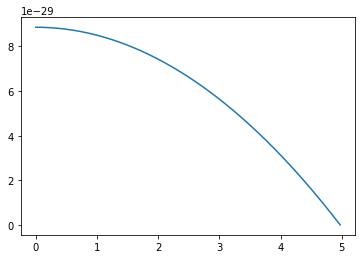

In [13]:
plt.plot(r_, X)

In [14]:
## 3 punto

In [15]:
V = (4/3)*pi*R**2

In [16]:
integral = sp.integrate. simpson(X*r**2 *4*pi/V,r)

In [17]:
print("El promedio de la integral esta dada por: ",integral)

El promedio de la integral esta dada por:  1.7461754052687266e-34


In [18]:
## 4 punto 

In [22]:
L = 1 # distancia de 0 a 1
T = 2 # tiempo de 0 a 2
N = 50
x = np.arange(0,R,dr)
D = 1/6
dt = 1e-4
t = np.arange(0,T,dt)
alpha = D*dt/dr**2
assert alpha < 1/12
print('Resumen:'
     f'\n  alpha={alpha}'
     f'\n  dx={dr}'
     f'\n  dt={dt}')


AssertionError: 